In [8]:
#!/usr/bin/env python

from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import Table, Column
from sqlalchemy import Integer, String
from sqlalchemy import sql, select, join, desc
import pandas as pd
import sqlite3

db_world = 'sqlite:////Users/rileygott/Library/CloudStorage/OneDrive-Personal/UF PhD Classes/BSC_6451_Computational_Tools_Research_Biology/github-account-rjgott/Code/Class_Files/data/world.sqlite'

engine = create_engine(db_world)
conn = engine.connect()
DBInfo = MetaData(engine)

print(DBInfo)

MetaData(bind=Engine(sqlite:////Users/rileygott/Library/CloudStorage/OneDrive-Personal/UF PhD Classes/BSC_6451_Computational_Tools_Research_Biology/github-account-rjgott/Code/Class_Files/data/world.sqlite))


In [9]:
# Auto-create the country object based on the metadata read into the DBInfo.
country=Table('country', DBInfo, autoload=True)

country


Table('country', MetaData(bind=Engine(sqlite:////Users/rileygott/Library/CloudStorage/OneDrive-Personal/UF PhD Classes/BSC_6451_Computational_Tools_Research_Biology/github-account-rjgott/Code/Class_Files/data/world.sqlite)), Column('Code', CHAR(length=3), table=<country>, primary_key=True, nullable=False, server_default=DefaultClause(<sqlalchemy.sql.elements.TextClause object at 0x125b2f9a0>, for_update=False)), Column('Name', CHAR(length=52), table=<country>, nullable=False, server_default=DefaultClause(<sqlalchemy.sql.elements.TextClause object at 0x125b2ec80>, for_update=False)), Column('Continent', TEXT(), table=<country>, nullable=False, server_default=DefaultClause(<sqlalchemy.sql.elements.TextClause object at 0x125b2f9d0>, for_update=False)), Column('Region', CHAR(length=26), table=<country>, nullable=False, server_default=DefaultClause(<sqlalchemy.sql.elements.TextClause object at 0x125b2fd60>, for_update=False)), Column('SurfaceArea', FLOAT(precision=10, asdecimal=2), table=<c

In [10]:
#Question 1 - Most recent country declaring indepenence in database

# Auto-create the country object based on the metadata read into the DBInfo.
country=Table('country', DBInfo, autoload=True)

# Mirroring this command: SELECT Id, Name, Population FROM city;
query = select([country.c.Name, country.c.IndepYear, country.c.SurfaceArea])\
    .order_by(desc(country.c.IndepYear))

result = conn.execute(query)
for row in result:
    print(row)

#Answer = Country "Palau" in 1994

('East Timor', 2002, Decimal('14874.0000000000'))
('Palau', 1994, Decimal('459.0000000000'))
('Czech Republic', 1993, Decimal('78866.0000000000'))
('Eritrea', 1993, Decimal('117600.0000000000'))
('Slovakia', 1993, Decimal('49012.0000000000'))
('Bosnia and Herzegovina', 1992, Decimal('51197.0000000000'))
('Armenia', 1991, Decimal('29800.0000000000'))
('Azerbaijan', 1991, Decimal('86600.0000000000'))
('Belarus', 1991, Decimal('207600.0000000000'))
('Estonia', 1991, Decimal('45227.0000000000'))
('Georgia', 1991, Decimal('69700.0000000000'))
('Croatia', 1991, Decimal('56538.0000000000'))
('Kazakstan', 1991, Decimal('2724900.0000000000'))
('Kyrgyzstan', 1991, Decimal('199900.0000000000'))
('Lithuania', 1991, Decimal('65301.0000000000'))
('Latvia', 1991, Decimal('64589.0000000000'))
('Moldova', 1991, Decimal('33851.0000000000'))
('Macedonia', 1991, Decimal('25713.0000000000'))
('Russian Federation', 1991, Decimal('17075400.0000000000'))
('Slovenia', 1991, Decimal('20256.0000000000'))
('Tajik

In [11]:
#Question 2 - Insert information for a country that has gained independence since 1994

print(country.insert())

INSERT INTO country ("Code", "Name", "Continent", "Region", "SurfaceArea", "IndepYear", "Population", "LifeExpectancy", "GNP", "GNPOld", "LocalName", "GovernmentForm", "HeadOfState", "Capital", "Code2") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


In [12]:
#Question 2 - continued

my_insert = country.insert().values(Name = 'East Timor', SurfaceArea = '14874.0000000000', IndepYear = '2002', GovernmentForm = 'Unitary Semi-presidential Republic', Population = '1340513')
print(my_insert)

INSERT INTO country ("Name", "SurfaceArea", "IndepYear", "Population", "GovernmentForm") VALUES (?, ?, ?, ?, ?)


In [13]:
#Question 2 - continued

result = conn.execute(my_insert)

IntegrityError: (sqlite3.IntegrityError) UNIQUE constraint failed: country.Code
[SQL: INSERT INTO country ("Name", "SurfaceArea", "IndepYear", "Population", "GovernmentForm") VALUES (?, ?, ?, ?, ?)]
[parameters: ('East Timor', 14874.0, '2002', '1340513', 'Unitary Semi-presidential Republic')]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

In [ ]:
#Question 2 - continued
query = select([country.c.Name, country.c.IndepYear, country.c.SurfaceArea, country.c.Population, country.c.GovernmentForm])\
    .order_by(desc(country.c.IndepYear))

result = conn.execute(query)
for row in result:
    print(row)

('East Timor', 2002, Decimal('14874.0000000000'), 1340513, 'Unitary Semi-presidential Republic')
('Palau', 1994, Decimal('459.0000000000'), 19000, 'Republic')
('Czech Republic', 1993, Decimal('78866.0000000000'), 10278100, 'Republic')
('Eritrea', 1993, Decimal('117600.0000000000'), 3850000, 'Republic')
('Slovakia', 1993, Decimal('49012.0000000000'), 5398700, 'Republic')
('Bosnia and Herzegovina', 1992, Decimal('51197.0000000000'), 3972000, 'Federal Republic')
('Armenia', 1991, Decimal('29800.0000000000'), 3520000, 'Republic')
('Azerbaijan', 1991, Decimal('86600.0000000000'), 7734000, 'Federal Republic')
('Belarus', 1991, Decimal('207600.0000000000'), 10236000, 'Republic')
('Estonia', 1991, Decimal('45227.0000000000'), 1439200, 'Republic')
('Georgia', 1991, Decimal('69700.0000000000'), 4968000, 'Republic')
('Croatia', 1991, Decimal('56538.0000000000'), 4473000, 'Republic')
('Kazakstan', 1991, Decimal('2724900.0000000000'), 16223000, 'Republic')
('Kyrgyzstan', 1991, Decimal('199900.00000

In [15]:
#Question 3 - Add two cities from East Timor to cities database

# Auto-create the city object basedon the metadata read into the DBInfo.
city=Table('city', DBInfo, autoload=True)

print(city.insert())

INSERT INTO city ("ID", "Name", "CountryCode", "District", "Population") VALUES (?, ?, ?, ?, ?)


In [16]:
#Question 3 - continued

my_insert2 = city.insert().values(Name = 'Dili', CountryCode = 'TL', Population = '222323')
print(my_insert2)

INSERT INTO city ("Name", "CountryCode", "Population") VALUES (?, ?, ?)


In [17]:
#Question 3 - continued

result = conn.execute(my_insert2)

In [18]:
#Question 3 - continued

my_insert3 = city.insert().values(Name = 'Ermera', CountryCode = 'TL', Population = '8907')
print(my_insert3)

INSERT INTO city ("Name", "CountryCode", "Population") VALUES (?, ?, ?)


In [19]:
#Question 3 - continued

result = conn.execute(my_insert3)

In [20]:
#Question 3 - continued

query2 = select([city.c.Name, city.c.CountryCode, city.c.Population])

result = conn.execute(query2)
for row in result:
    print(row)

('Kabul', 'AFG', 1780000)
('Qandahar', 'AFG', 237500)
('Herat', 'AFG', 186800)
('Mazar-e-Sharif', 'AFG', 127800)
('Rotterdam', 'NLD', 593321)
('Haag', 'NLD', 440900)
('Utrecht', 'NLD', 234323)
('Eindhoven', 'NLD', 201843)
('Tilburg', 'NLD', 193238)
('Groningen', 'NLD', 172701)
('Breda', 'NLD', 160398)
('Apeldoorn', 'NLD', 153491)
('Nijmegen', 'NLD', 152463)
('Enschede', 'NLD', 149544)
('Haarlem', 'NLD', 148772)
('Almere', 'NLD', 142465)
('Arnhem', 'NLD', 138020)
('Zaanstad', 'NLD', 135621)
('�s-Hertogenbosch', 'NLD', 129170)
('Amersfoort', 'NLD', 126270)
('Maastricht', 'NLD', 122087)
('Dordrecht', 'NLD', 119811)
('Leiden', 'NLD', 117196)
('Haarlemmermeer', 'NLD', 110722)
('Zoetermeer', 'NLD', 110214)
('Emmen', 'NLD', 105853)
('Zwolle', 'NLD', 105819)
('Ede', 'NLD', 101574)
('Delft', 'NLD', 95268)
('Heerlen', 'NLD', 95052)
('Alkmaar', 'NLD', 92713)
('Willemstad', 'ANT', 2345)
('Tirana', 'ALB', 270000)
('Alger', 'DZA', 2168000)
('Oran', 'DZA', 609823)
('Constantine', 'DZA', 443727)
('Ann

In [21]:
#Question 4 - Use LifeExpectancy data in the country db on y axis and plot data against some other value

df_query = select([country.c.Name, country.c.LifeExpectancy, country.c.GNP, country.c.Population, country.c.GovernmentForm])

result = conn.execute(df_query)
for row in result:
    print(row)

('Aruba', Decimal('78.4000000000'), Decimal('828.0000000000'), 103000, 'Nonmetropolitan Territory of The Netherlands')
('Afghanistan', Decimal('45.9000000000'), Decimal('5976.0000000000'), 22720000, 'Islamic Emirate')
('Angola', Decimal('38.3000000000'), Decimal('6648.0000000000'), 12878000, 'Republic')
('Anguilla', Decimal('76.1000000000'), Decimal('63.2000000000'), 8000, 'Dependent Territory of the UK')
('Albania', Decimal('71.6000000000'), Decimal('3205.0000000000'), 3401200, 'Republic')
('Andorra', Decimal('83.5000000000'), Decimal('1630.0000000000'), 78000, 'Parliamentary Coprincipality')
('Netherlands Antilles', Decimal('74.7000000000'), Decimal('1941.0000000000'), 217000, 'Nonmetropolitan Territory of The Netherlands')
('United Arab Emirates', Decimal('74.1000000000'), Decimal('37966.0000000000'), 2441000, 'Emirate Federation')
('Argentina', Decimal('75.1000000000'), Decimal('340238.0000000000'), 37032000, 'Federal Republic')
('Armenia', Decimal('66.4000000000'), Decimal('1813.0

In [22]:
#Question 4 - continued

#make dataframe for plotting LifeExpectancy vs. GNP
df = pd.read_sql(df_query, conn)
df.head(10)

,Name,LifeExpectancy,GNP,Population,GovernmentForm
0,Aruba,78.4,828.0,103000,Nonmetropolitan Territory of The Netherlands
1,Afghanistan,45.9,5976.0,22720000,Islamic Emirate
2,Angola,38.3,6648.0,12878000,Republic
3,Anguilla,76.1,63.2,8000,Dependent Territory of the UK
4,Albania,71.6,3205.0,3401200,Republic
5,Andorra,83.5,1630.0,78000,Parliamentary Coprincipality
6,Netherlands Antilles,74.7,1941.0,217000,Nonmetropolitan Territory of The Netherlands
7,United Arab Emirates,74.1,37966.0,2441000,Emirate Federation
8,Argentina,75.1,340238.0,37032000,Federal Republic
9,Armenia,66.4,1813.0,3520000,Republic


Text(0.5, 1.0, 'Life Expectancy vs. Gross National Product of Independent Countries')

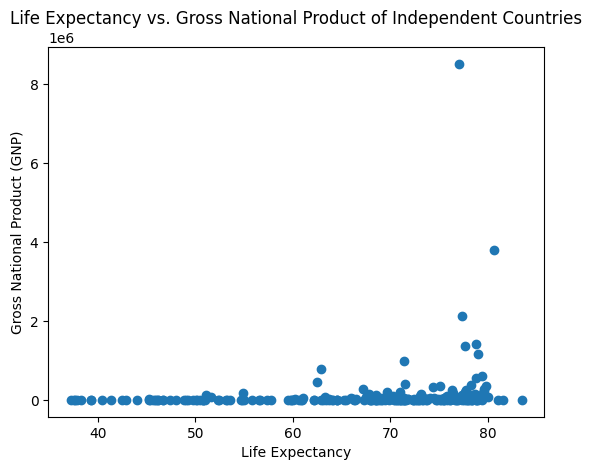

In [23]:
#Question 4 - continued

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

#plotting LifeExpectancy vs. GNP
plt.scatter(df['LifeExpectancy'], df['GNP'])
plt.xlabel('Life Expectancy')
plt.ylabel('Gross National Product (GNP)')
plt.title('Life Expectancy vs. Gross National Product of Independent Countries')

Text(0.5, 1.0, 'Life Expectancy vs. Population Size of Independent Countries')

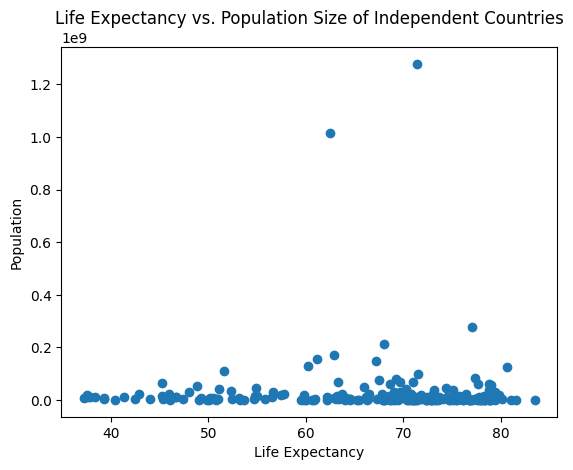

In [24]:
#Question 4 - Additional plot

#plotting LifeExpectancy vs. Population
plt.scatter(df['LifeExpectancy'], df['Population'])
plt.xlabel('Life Expectancy')
plt.ylabel('Population')
plt.title('Life Expectancy vs. Population Size of Independent Countries')

In [49]:
#Extra Credit - Plot LifeExpectancy vs total population of all cities in the country/total population of country

# Auto-create the city and country objects basedon the metadata read into the DBInfo.
city=Table('city', DBInfo, autoload=True)
print(city.insert())

country=Table('country', DBInfo, autoload=True)
print(country.insert())

#Use city and country objects created above to make one table with


INSERT INTO city ("ID", "Name", "CountryCode", "District", "Population") VALUES (?, ?, ?, ?, ?)
INSERT INTO country ("Code", "Name", "Continent", "Region", "SurfaceArea", "IndepYear", "Population", "LifeExpectancy", "GNP", "GNPOld", "LocalName", "GovernmentForm", "HeadOfState", "Capital", "Code2") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


In [51]:
#Joining data from country and city tables to make dataframe for analysis

join_obj = country.outerjoin(city, city.c.CountryCode == country.c.Code)

sel_st = select([country.c.Name, country.c.Population, country.c.LifeExpectancy, city.c.Name, city.c.Population, city.c.CountryCode]).select_from(join_obj)

res = conn.execute(sel_st)

for row in res:
    print(row)

#Make pandas dataframe of selected data from country and city tables

df_world=pd.read_sql(sel_st, conn)

df_world.head()

('Aruba', 103000, Decimal('78.4000000000'), 'Oranjestad', 29034, 'ABW')
('Afghanistan', 22720000, Decimal('45.9000000000'), 'Kabul', 1780000, 'AFG')
('Afghanistan', 22720000, Decimal('45.9000000000'), 'Qandahar', 237500, 'AFG')
('Afghanistan', 22720000, Decimal('45.9000000000'), 'Herat', 186800, 'AFG')
('Afghanistan', 22720000, Decimal('45.9000000000'), 'Mazar-e-Sharif', 127800, 'AFG')
('Angola', 12878000, Decimal('38.3000000000'), 'Luanda', 2022000, 'AGO')
('Angola', 12878000, Decimal('38.3000000000'), 'Huambo', 163100, 'AGO')
('Angola', 12878000, Decimal('38.3000000000'), 'Lobito', 130000, 'AGO')
('Angola', 12878000, Decimal('38.3000000000'), 'Benguela', 128300, 'AGO')
('Angola', 12878000, Decimal('38.3000000000'), 'Namibe', 118200, 'AGO')
('Anguilla', 8000, Decimal('76.1000000000'), 'South Hill', 961, 'AIA')
('Anguilla', 8000, Decimal('76.1000000000'), 'The Valley', 595, 'AIA')
('Albania', 3401200, Decimal('71.6000000000'), 'Tirana', 270000, 'ALB')
('Andorra', 78000, Decimal('83.500

,Name,Population,LifeExpectancy,Name_1,Population_1,CountryCode
0,Aruba,103000,78.4,Oranjestad,29034.0,ABW
1,Afghanistan,22720000,45.9,Kabul,1780000.0,AFG
2,Afghanistan,22720000,45.9,Qandahar,237500.0,AFG
3,Afghanistan,22720000,45.9,Herat,186800.0,AFG
4,Afghanistan,22720000,45.9,Mazar-e-Sharif,127800.0,AFG


In [55]:
#Calculate urban population of each country

df_world_sum = df_world.groupby(['CountryCode'])['Population_1'].sum().reset_index()
df_world_sum 

,CountryCode,Population_1
0,ABW,29034.0
1,AFG,2332100.0
2,AGO,2561600.0
3,AIA,1556.0
4,ALB,270000.0
...,...,...
227,YEM,1743700.0
228,YUG,2189507.0
229,ZAF,15196370.0
230,ZMB,2473500.0


In [56]:
#Make data frame for country data

df_query2 = select([country.c.Name, country.c.Code, country.c.LifeExpectancy, country.c.Population])

df = pd.read_sql(df_query2, conn)
df.head(10)

,Name,Code,LifeExpectancy,Population
0,Aruba,ABW,78.4,103000
1,Afghanistan,AFG,45.9,22720000
2,Angola,AGO,38.3,12878000
3,Anguilla,AIA,76.1,8000
4,Albania,ALB,71.6,3401200
5,Andorra,AND,83.5,78000
6,Netherlands Antilles,ANT,74.7,217000
7,United Arab Emirates,ARE,74.1,2441000
8,Argentina,ARG,75.1,37032000
9,Armenia,ARM,66.4,3520000


In [57]:
#Create df combining urban population calculation with life expectancy and population data

df_comb = pd.merge(df_world_sum, df, how = 'inner', left_on = 'CountryCode', right_on = 'Code')
df_comb

,CountryCode,Population_1,Name,Code,LifeExpectancy,Population
0,ABW,29034.0,Aruba,ABW,78.4,103000
1,AFG,2332100.0,Afghanistan,AFG,45.9,22720000
2,AGO,2561600.0,Angola,AGO,38.3,12878000
3,AIA,1556.0,Anguilla,AIA,76.1,8000
4,ALB,270000.0,Albania,ALB,71.6,3401200
...,...,...,...,...,...,...
227,YEM,1743700.0,Yemen,YEM,59.8,18112000
228,YUG,2189507.0,Yugoslavia,YUG,72.4,10640000
229,ZAF,15196370.0,South Africa,ZAF,51.1,40377000
230,ZMB,2473500.0,Zambia,ZMB,37.2,9169000


In [58]:
#Calculate urban percentage population and add to data frame.

df_comb['UrbanPercent'] = df_comb['Population_1'].div(df_comb['Population'].values)
df_comb


,CountryCode,Population_1,Name,Code,LifeExpectancy,Population,UrbanPercent
0,ABW,29034.0,Aruba,ABW,78.4,103000,0.281883
1,AFG,2332100.0,Afghanistan,AFG,45.9,22720000,0.102645
2,AGO,2561600.0,Angola,AGO,38.3,12878000,0.198913
3,AIA,1556.0,Anguilla,AIA,76.1,8000,0.194500
4,ALB,270000.0,Albania,ALB,71.6,3401200,0.079384
...,...,...,...,...,...,...,...
227,YEM,1743700.0,Yemen,YEM,59.8,18112000,0.096273
228,YUG,2189507.0,Yugoslavia,YUG,72.4,10640000,0.205781
229,ZAF,15196370.0,South Africa,ZAF,51.1,40377000,0.376362
230,ZMB,2473500.0,Zambia,ZMB,37.2,9169000,0.269768


Text(0.5, 1.0, 'Life Expectancy vs. Urban Population')

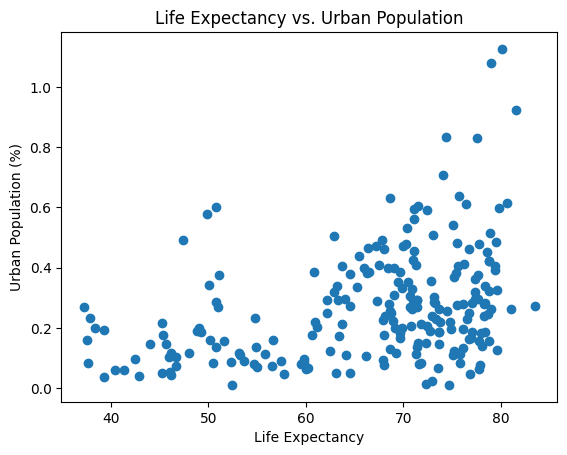

In [60]:
#Plot Life Expectancy vs. Urban Population Percentage

#plotting LifeExpectancy vs. Population
plt.scatter(df_comb['LifeExpectancy'], df_comb['UrbanPercent'])
plt.xlabel('Life Expectancy')
plt.ylabel('Urban Population (%)')
plt.title('Life Expectancy vs. Urban Population')